In [ ]:
# Part 1 : Importing the libraries 

import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True' ## To save kernel from dying
torch.manual_seed(123) # pytorch seed, to keep loss stability in the working environment 
#------------
#plt.style.use('ggplot')
#-----------  
import matplotlib
matplotlib.rcParams['figure.dpi'] = 800  # highres display
# plt.rcParams["figure.figsize"] = (18, 2)
# plt.rcParams.update({'font.size': 22}) 
# import time
# start_time = time.time() 


# Part 2 : Generate data and display the function

# Generate data
x = np.linspace(-10, 10, 500)
y = np.sinc(x)
# Convert data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
data_slice = 240
# Slice data for training from the left-hand side
x_train = x[0:data_slice:2]  # [0:240:5] from LHS
y_train = y[0:data_slice:2]  # [0:240:5] from LHS
# Convert train data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
plt.style.use('ggplot')

# Plot the data
plt.figure(figsize=(20, 12))
plt.ylim(-0.5, 1.3)
plt.plot(x, y, 'b', label='True Function [sinc function]')
plt.scatter(x_train, y_train, label='Data Points', c='red')  
plt.xlabel('x', fontsize=26)  # Set font size for x-axis label
plt.ylabel('y', fontsize=26)  # Set font size for y-axis label

# Set tick parameters to increase size of axis number 
plt.xticks(fontsize=26) 
plt.yticks(fontsize=26)
plt.legend(fontsize=26)
#plt.grid() if activate this then it will turn off the gird lines
plt.savefig('1_exact_function_sinc_'+str(data_slice)+'_1d.png', dpi=800) ## Save the image 
plt.show()  

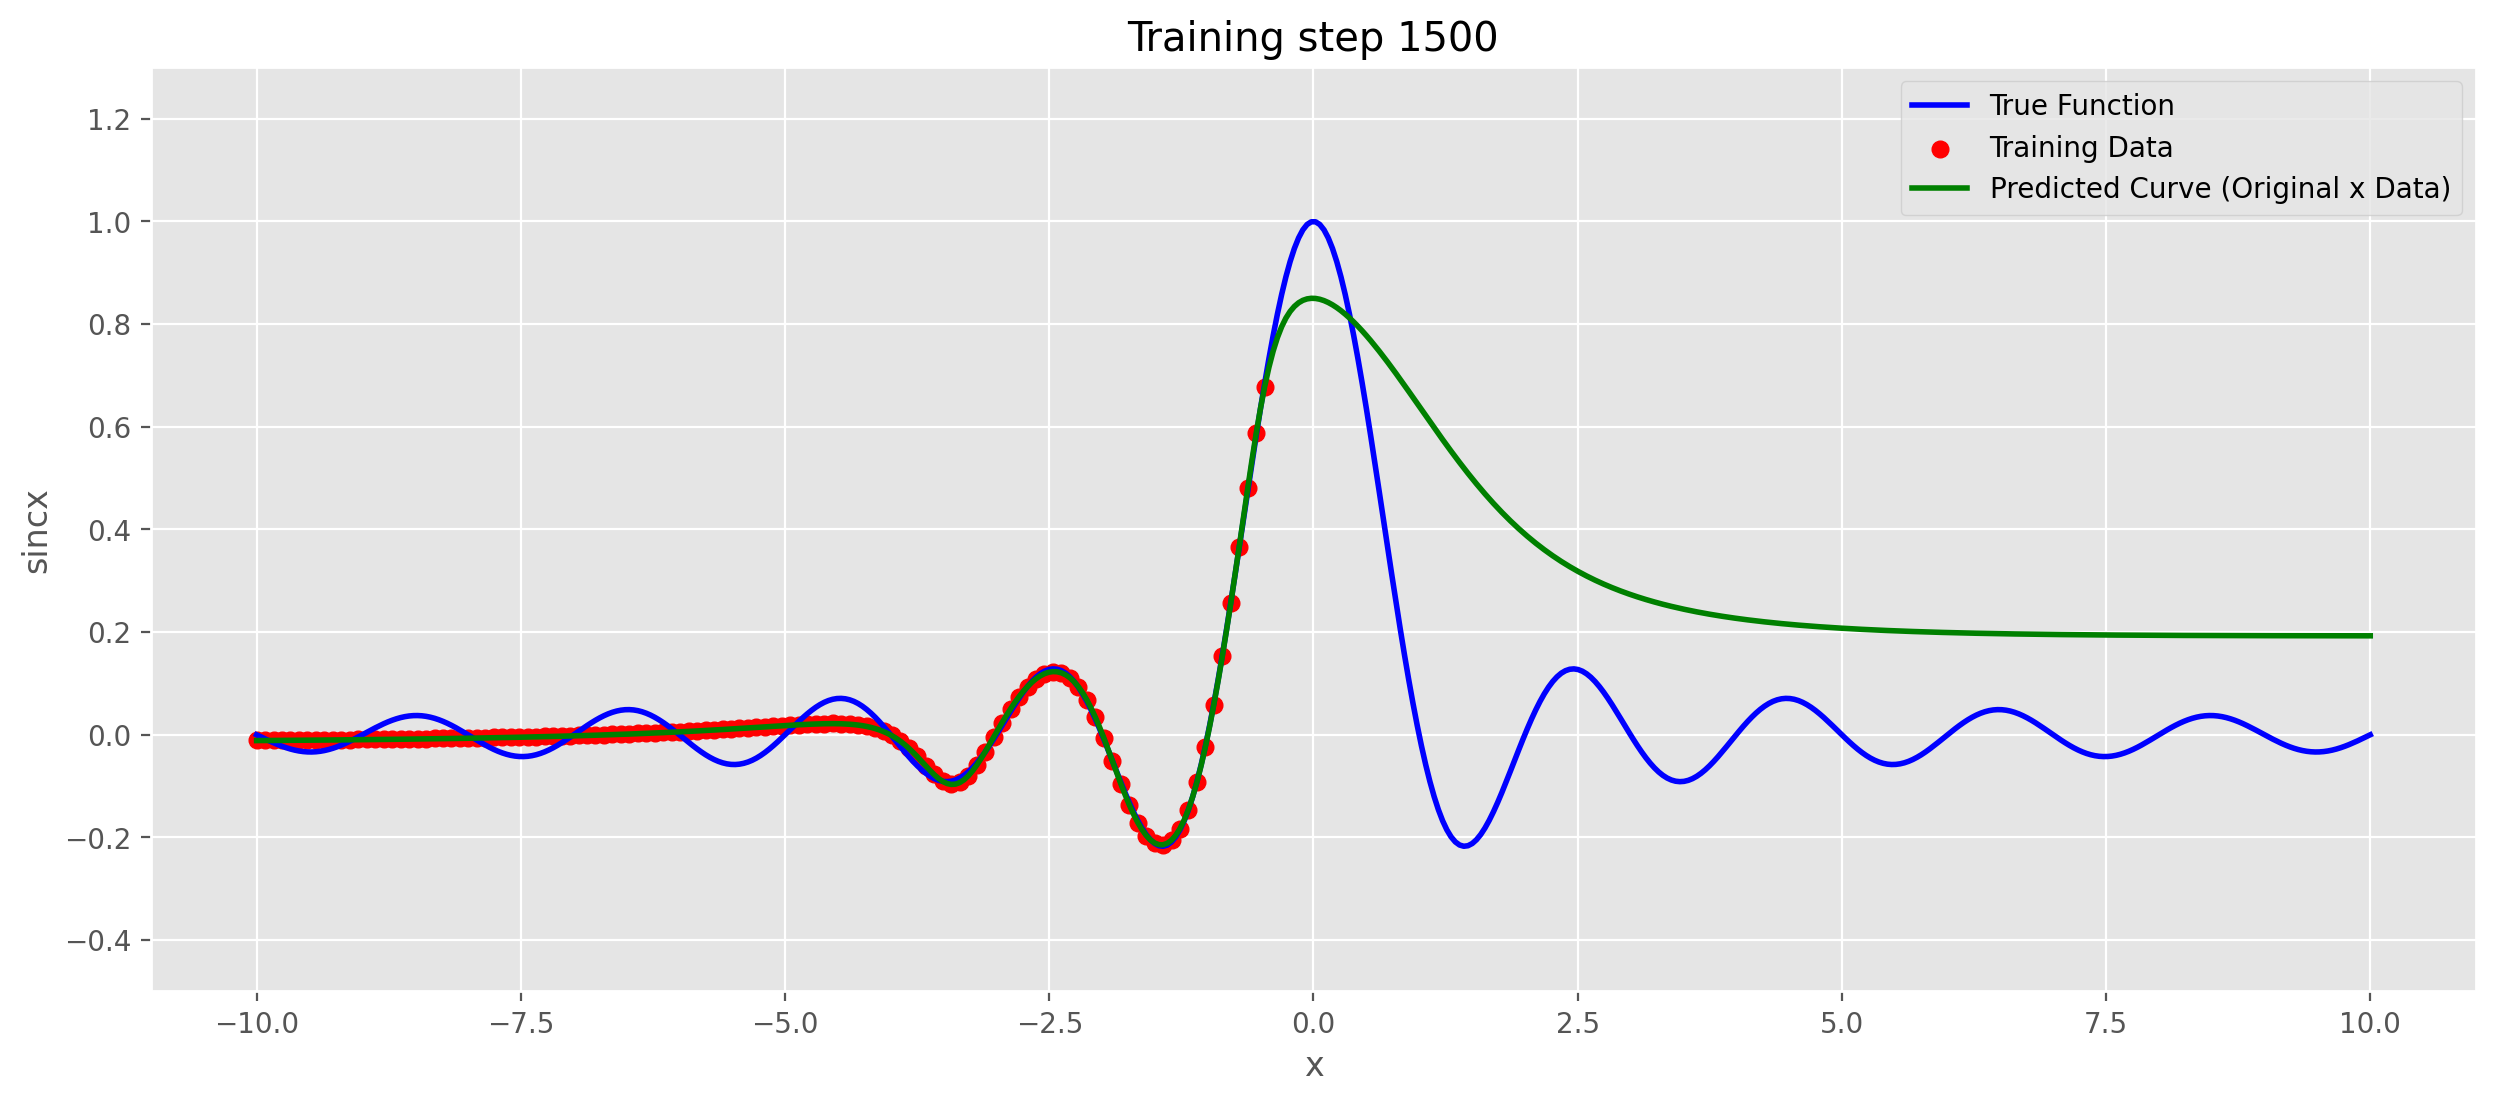

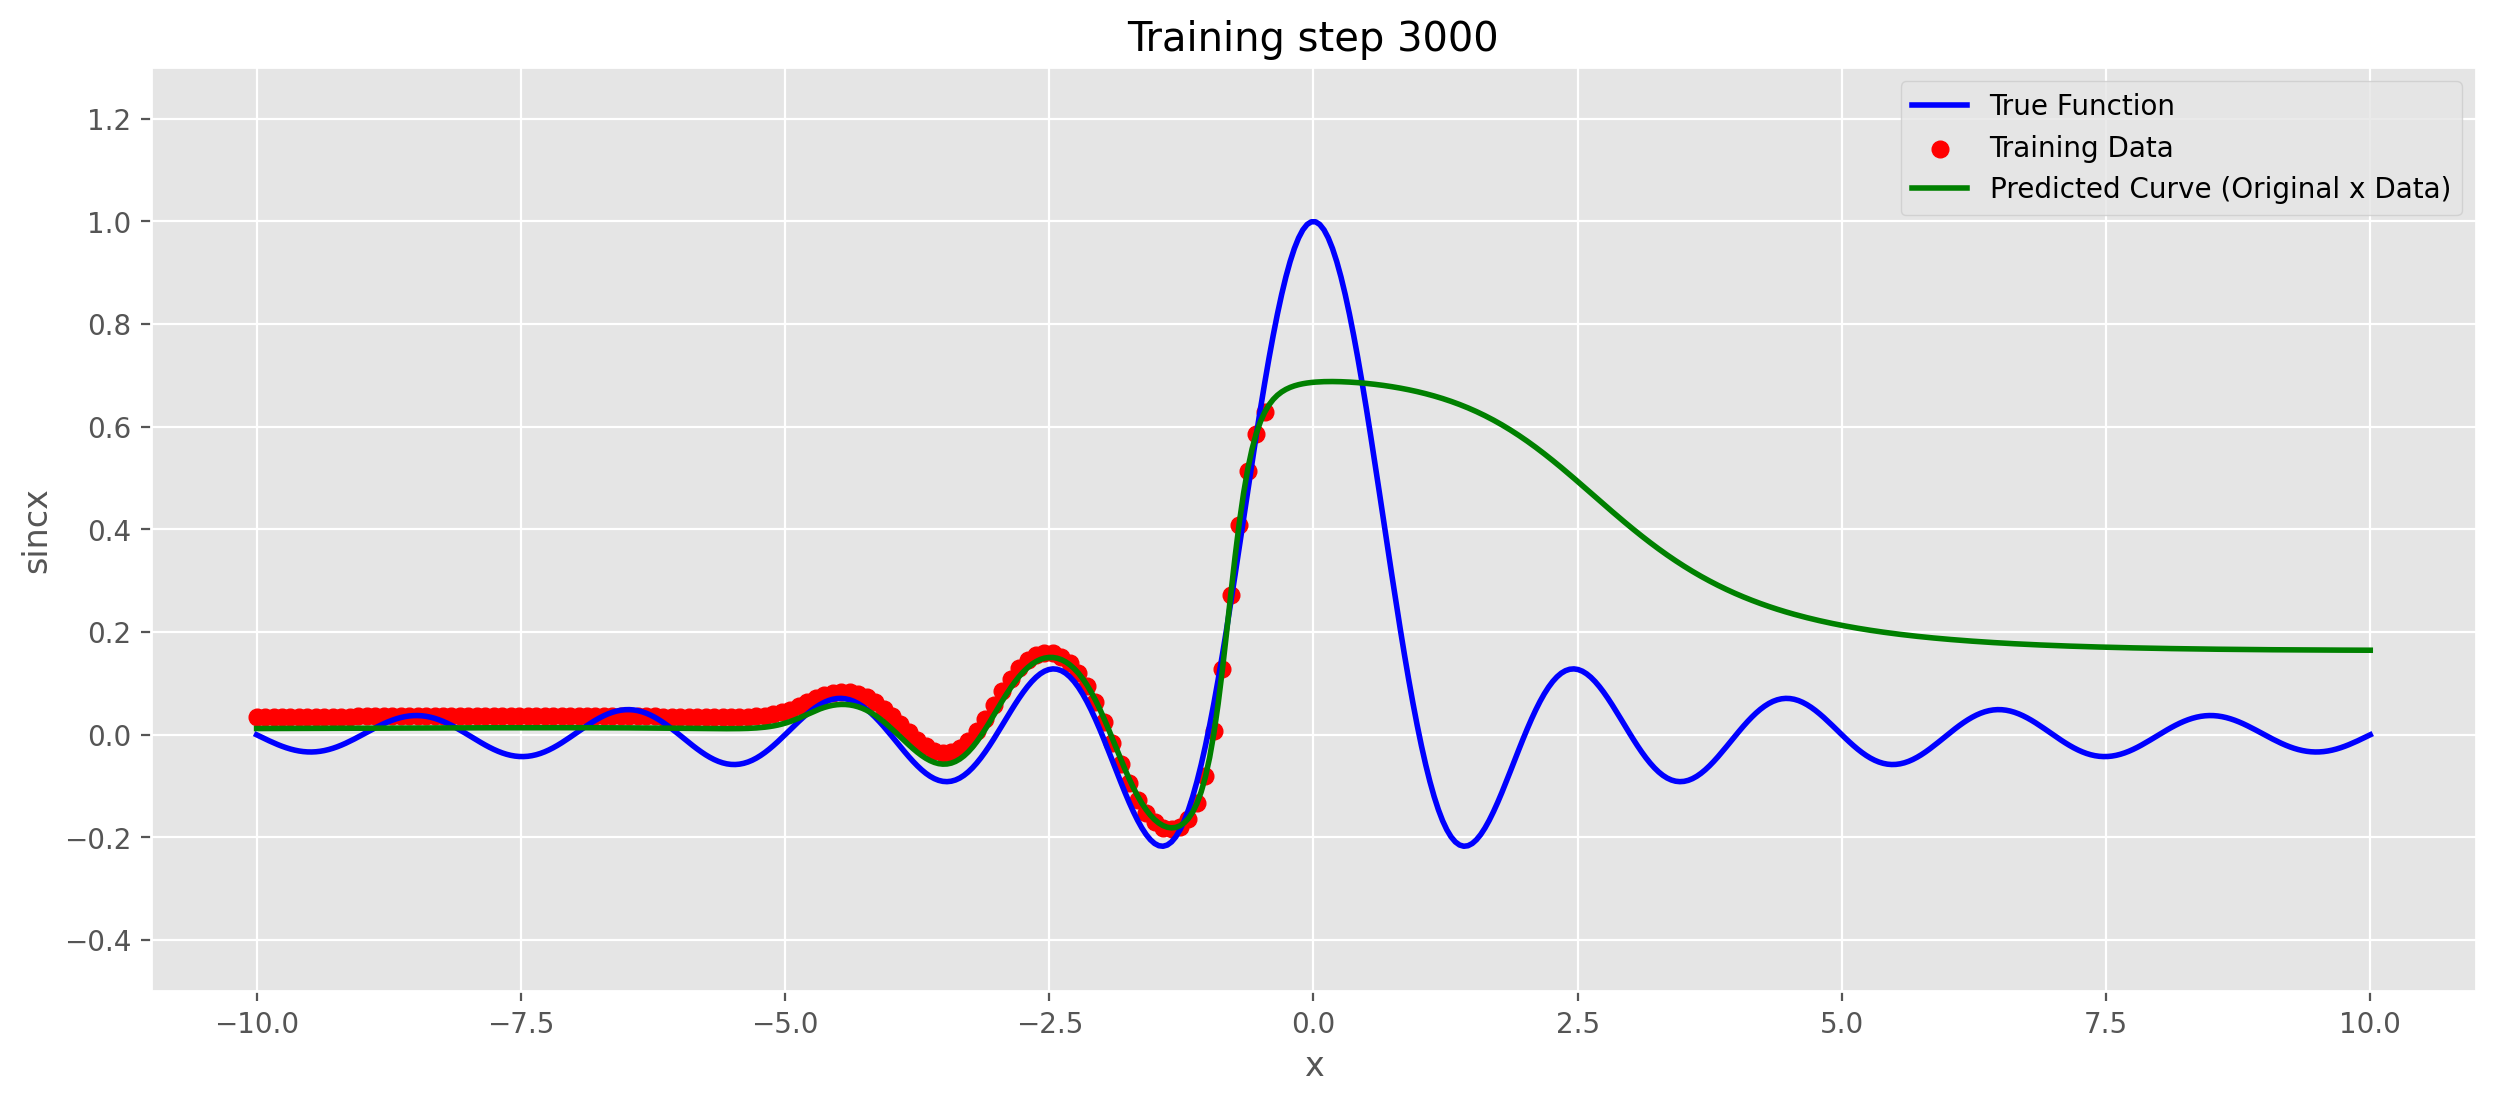

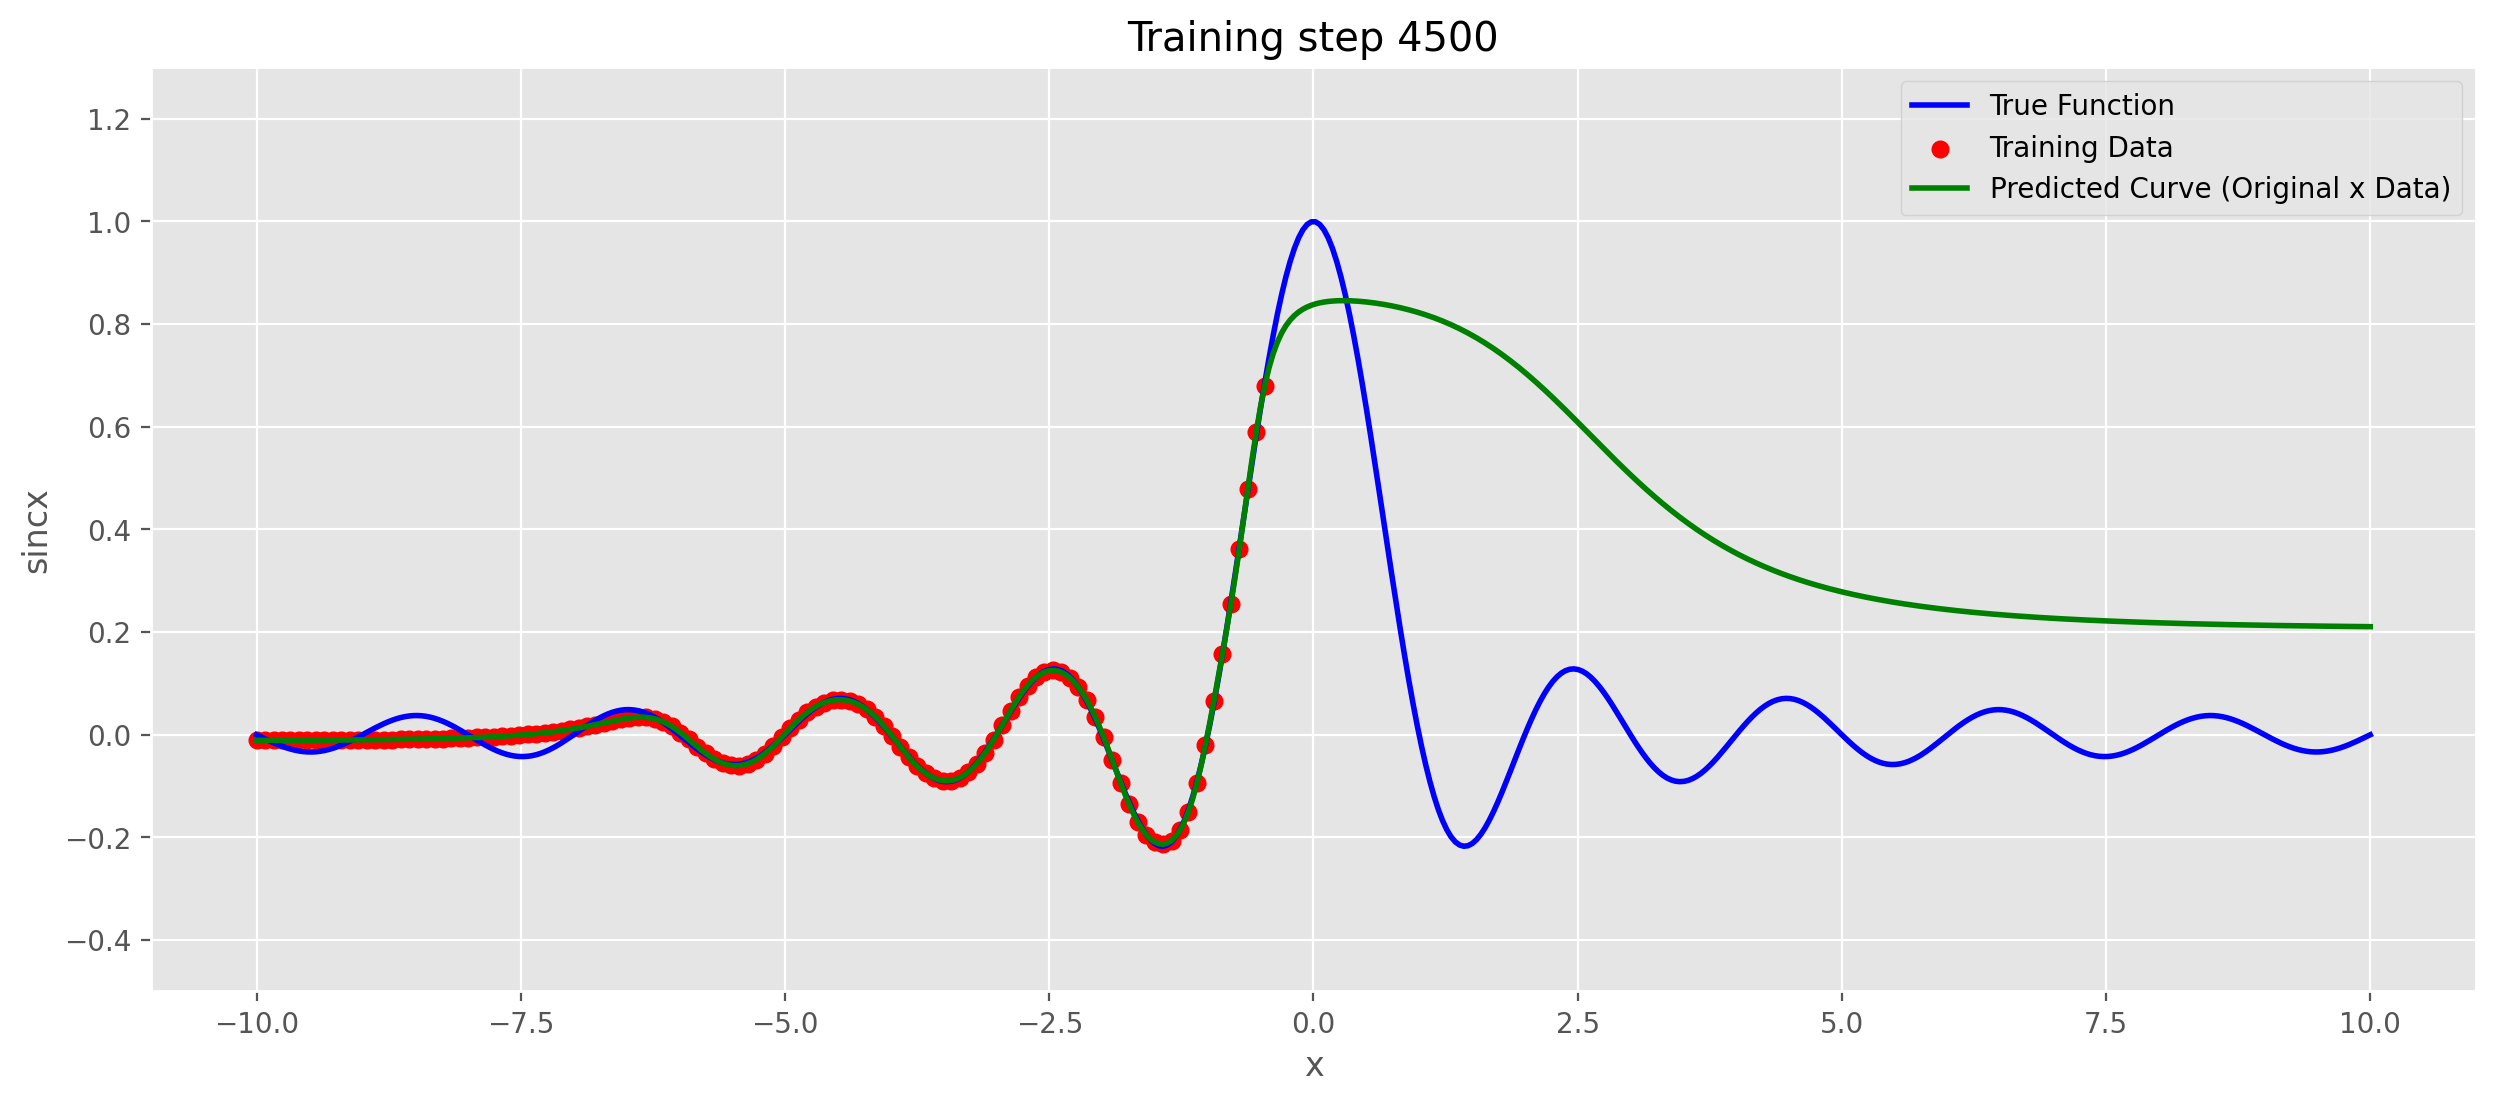

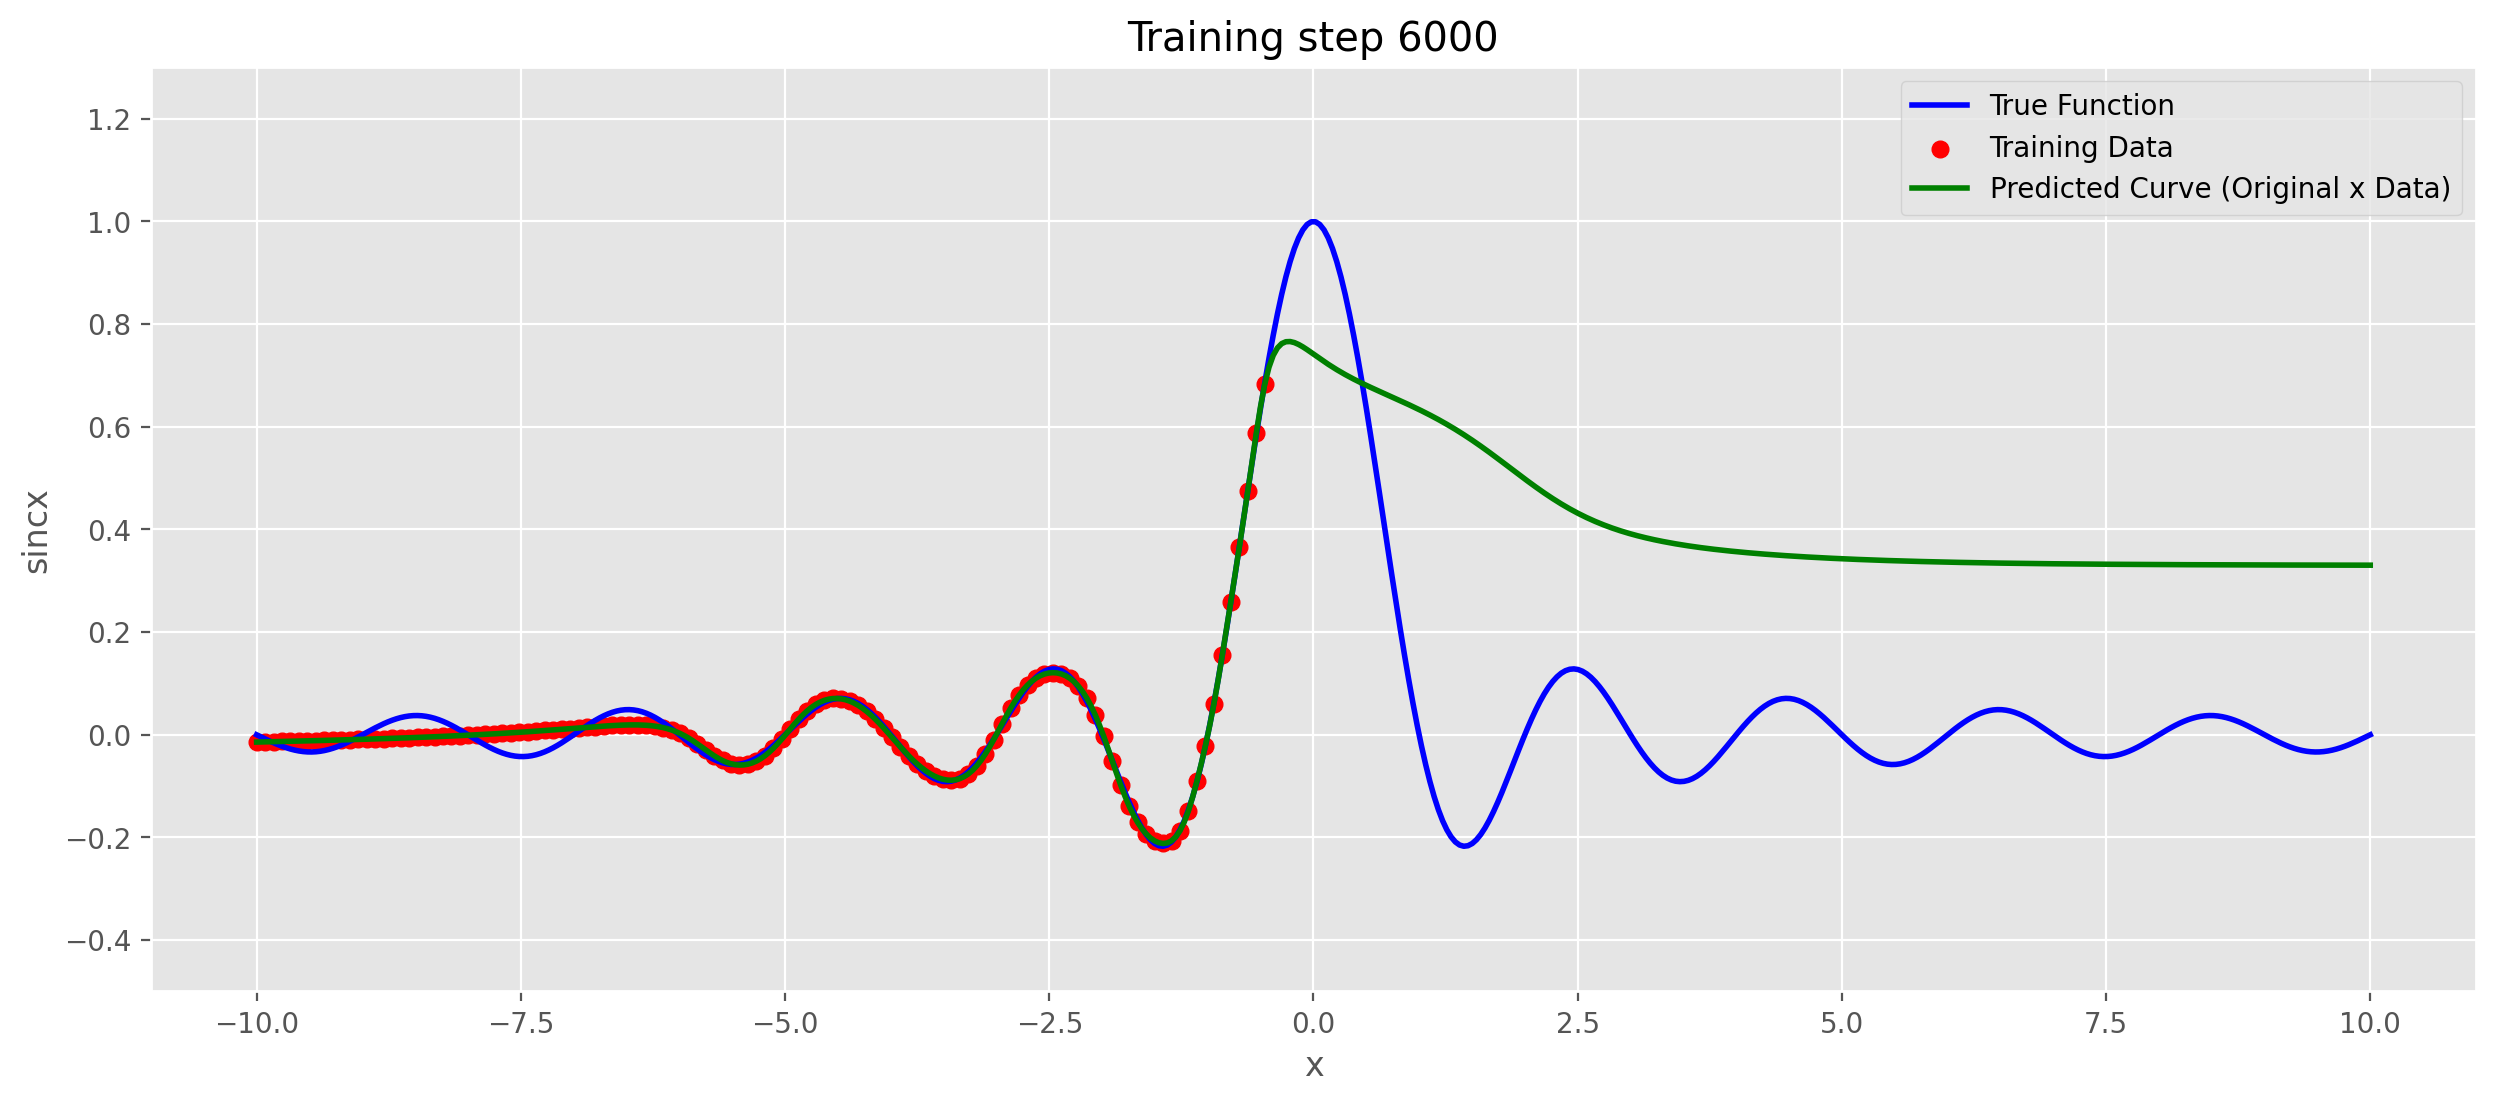

In [2]:
                                       ## L2 REGULARIZATION WEIGHT DECAY_ proparagation plot ##
# Part 3 : Defining the model

torch.manual_seed(123)  
class SincApproximator(nn.Module):
    def __init__(self):
        super(SincApproximator, self).__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 32)
        self.fc4 = nn.Linear(32, 32)  # Additional hidden layer
        self.fc5 = nn.Linear(32, 1)
        
    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = torch.tanh(self.fc4(x))
        x = self.fc5(x)
        return x

# Instantiate the model
model = SincApproximator()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.000001)  # weight decay here 1e-6

Sinc_losses = []  ## To store the loss in a file 

# Part 4: Train the model and NN prediction 

num_epochs = 6500 #3500
for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(x_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    Sinc_losses.append(loss.item()) ## to store loss in that file 

    # Plot the data every 1500 epochs
    if (epoch + 1) % 1500 == 0:
        with torch.no_grad():
            y_pred_all = model(x_tensor)

        plt.figure(figsize=(15, 6))
        plt.ylim(-0.5, 1.3)
        plt.plot(x, y, color='b', label='True Function', linewidth=2)
        plt.scatter(x_train, y_pred.detach().numpy(), color='r', label='Training Data')
        plt.plot(x, y_pred_all.detach().numpy(), color='g', label='Predicted Curve (Original x Data)', linewidth=2)
        plt.xlabel('x')
        plt.ylabel('sincx')
        plt.title(f"Training step {epoch + 1}")
        plt.legend()
        plt.savefig(f'2_NN_prediction_sinc_{data_slice}_epoch_{epoch + 1}_1d.png', dpi=800) if (epoch + 1) % 1500 == 0 else None
        ##dpi sets the resolution
        plt.show()
        plt.close("all") ## Close all plots after showing



# saving the model (to save learned pararmeters of the model or trained model) in trained_model_sinc.pth file and path
torch.save(model.state_dict(), 'trained_model_sinc.pth')

# To save the model configuration or (model architecture and hyperparameters)
model_config_sinc = {
    'input_size': 1,
    'hidden_sizes': [32, 32, 32, 32],
    'output_size': 1,
    'activation': 'tanh',
    'optimizer': 'Adam',
    'learning_rate': 0.01,
    'weight_decay': 0.000001,
    'num_epochs': num_epochs
}
config_file = 'model_config_sinc.pth' ## Config_file name and 'model_config_sinc.pth path
torch.save(model_config_sinc, config_file)



# To save predicted data in file 
y_pred_sinc_np = y_pred_all.detach().numpy()
# Specifying the file path where want to save the predicted data
predicted_data_sinc_file = 'predicted_data_sinc.csv'
# Save the predicted data to a CSV file
np.savetxt(predicted_data_sinc_file,y_pred_sinc_np, delimiter=',')

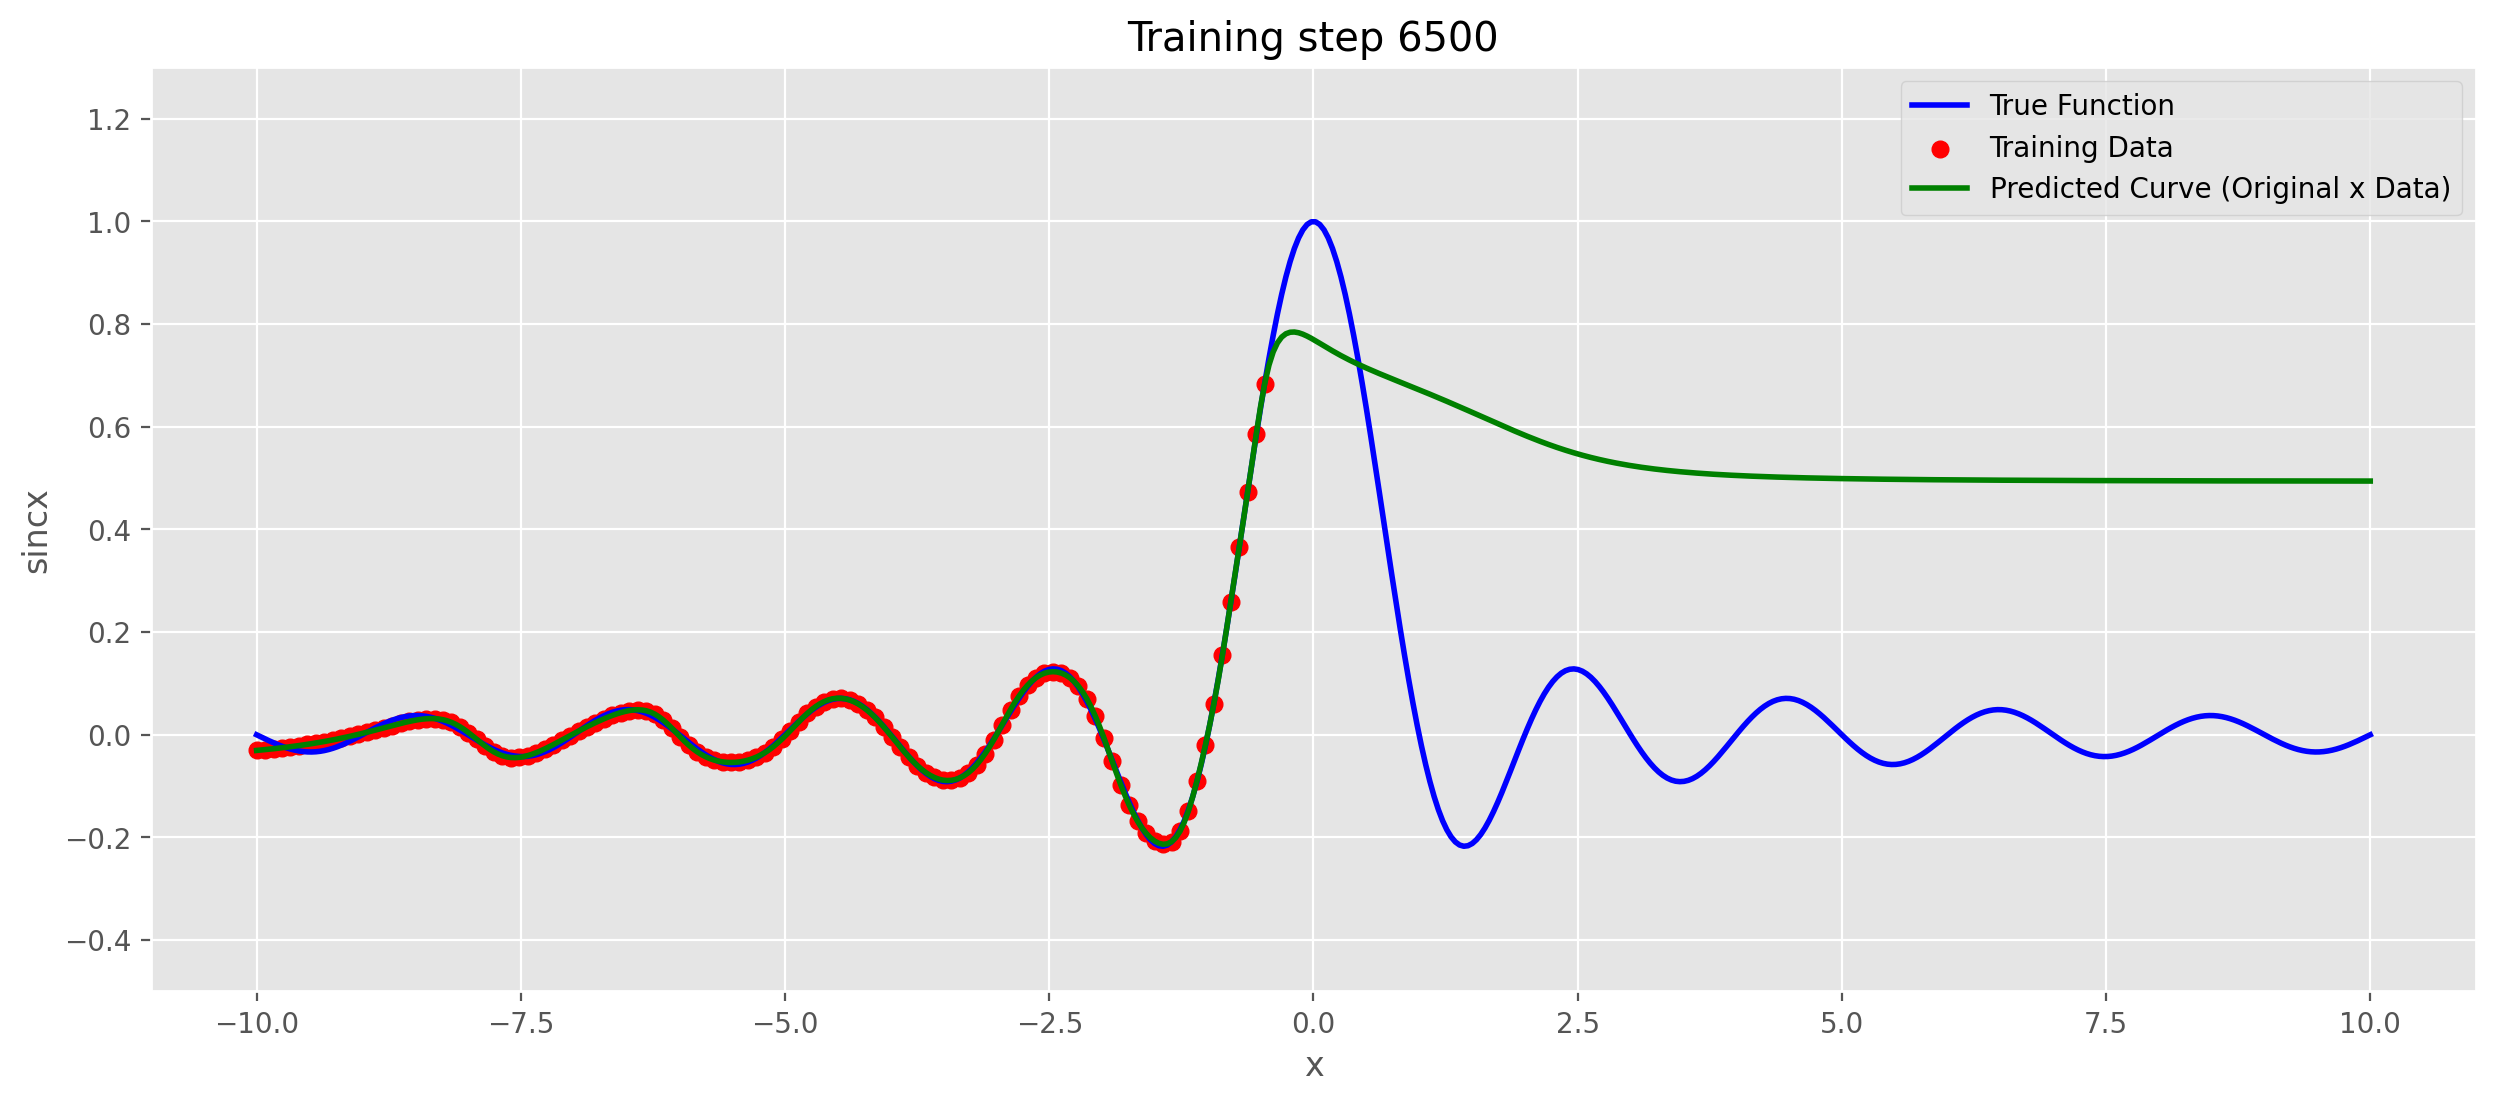

In [3]:
# Evaluate the model on the entire dataset x
with torch.no_grad(): 
    y_pred_all = model(x_tensor)
    
# Plot the original data, training data, and predicted curve on training and original x data
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(15, 6))
plt.ylim(-0.5, 1.3)
plt.plot(x, y, color='b', label='True Function', linewidth=2)
plt.scatter(x_train,y_pred.detach().numpy(), color='r', label='Training Data')
plt.plot(x,y_pred_all.detach().numpy(), color='g', label='Predicted Curve (Original x Data)', linewidth=2)
plt.xlabel('x')
plt.ylabel('sincx')
plt.title(f"Training step 6500")
plt.legend()
plt.savefig('3_NN_prediction_sinc_240_epoch_6500_1d.png', dpi=800) 
plt.show()
plt.close("all") ## Close all plots after showing (to free memory)

In [4]:
# Store losses per epoch in a file
with open('Sinc_nn_loss.txt', 'w') as f:
    for epoch, loss in enumerate(Sinc_losses):
        f.write(f"Epoch {epoch+1}: {loss}\n")

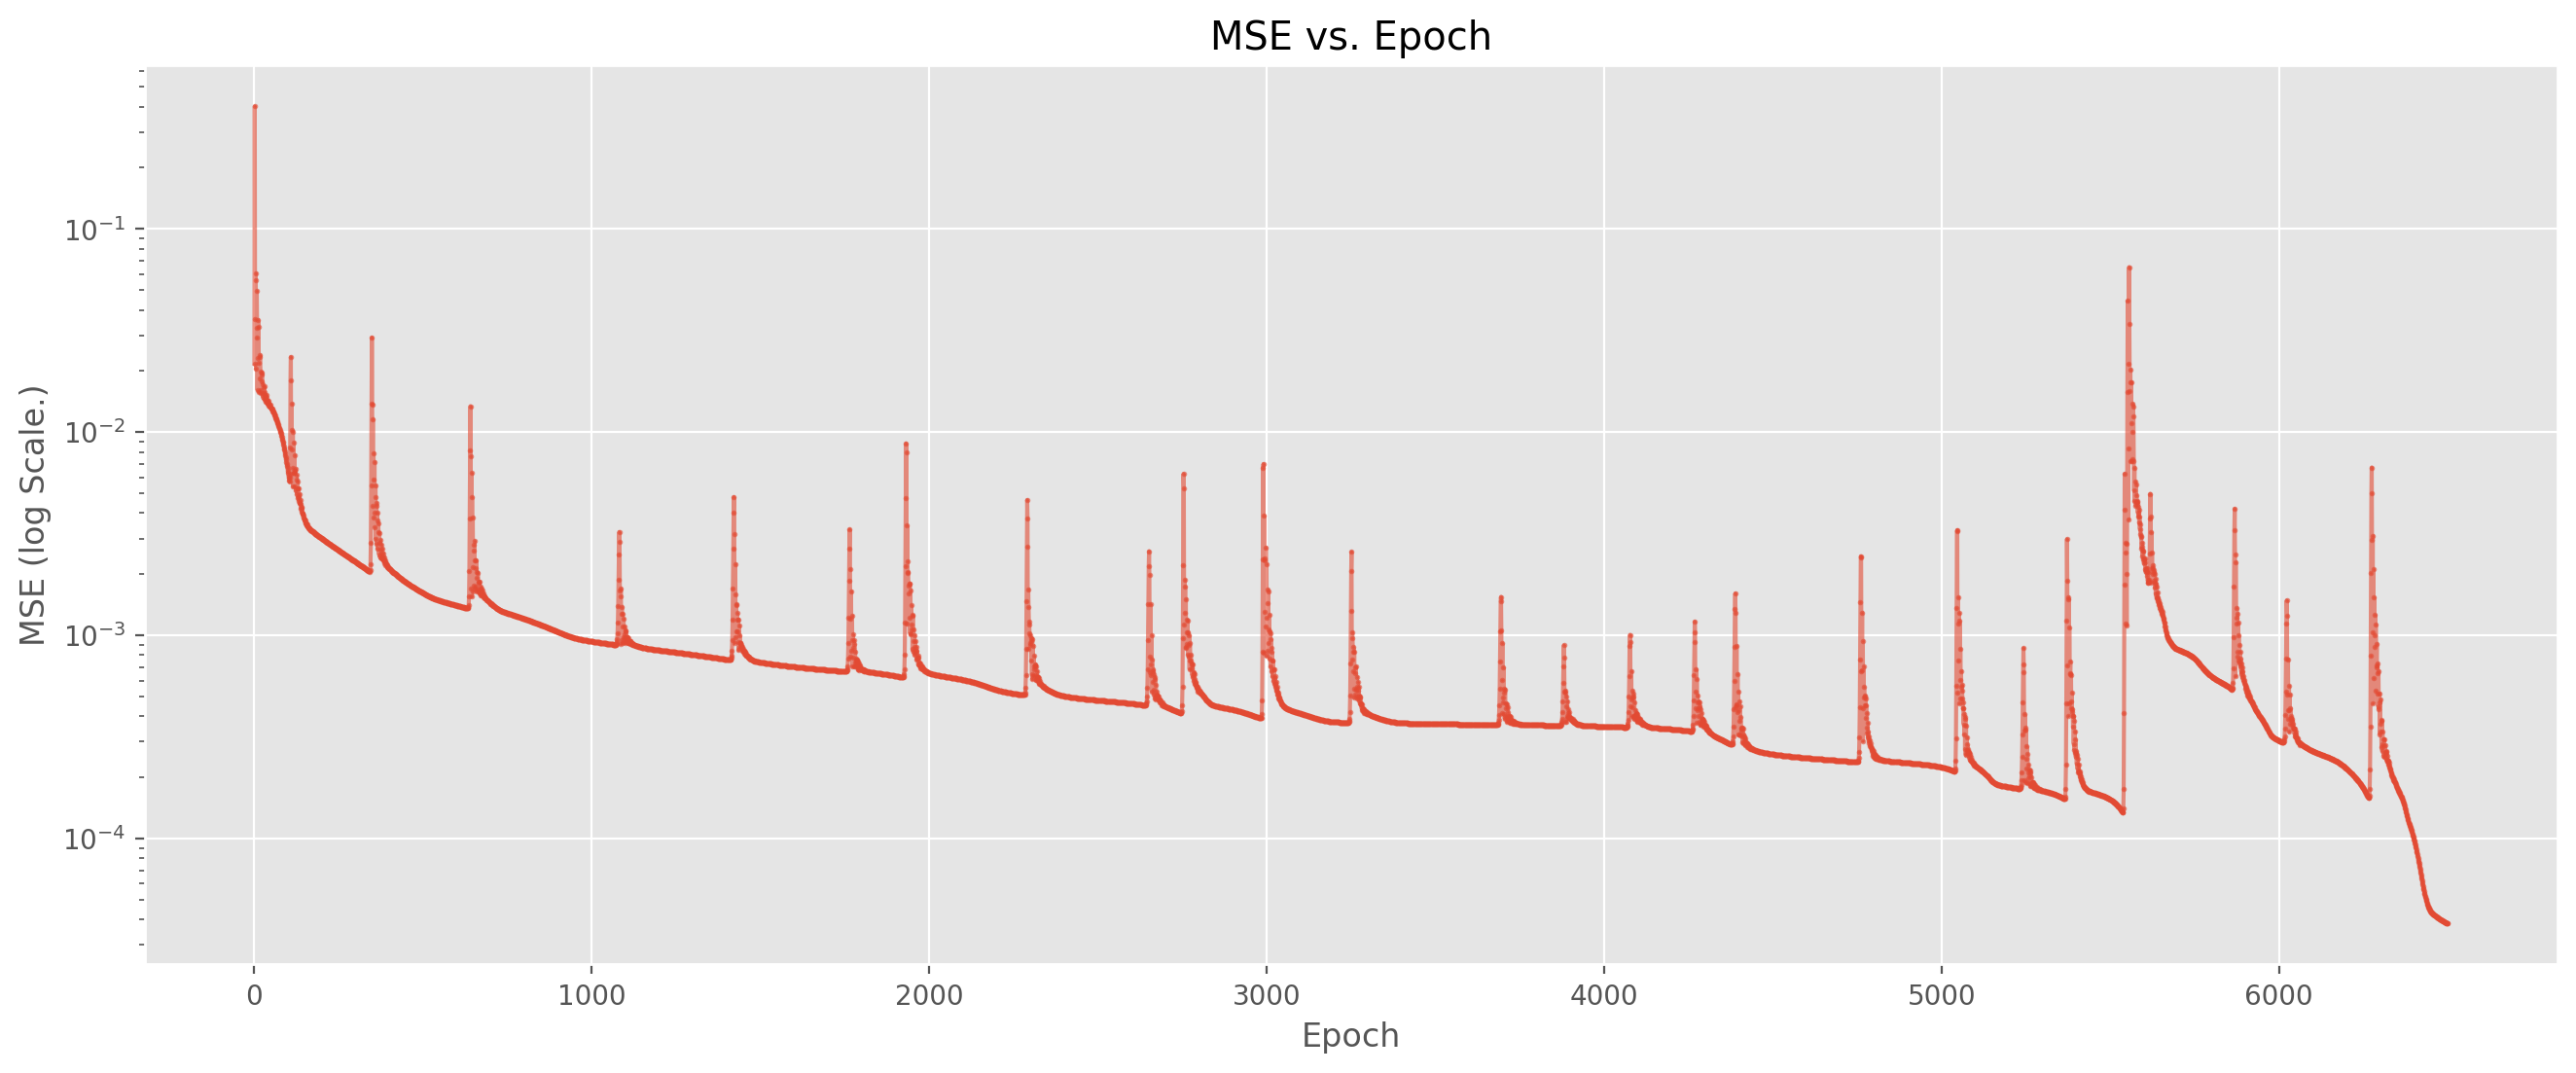

In [5]:
# Part 5: Visualize MSE vs. Epoch

plt.figure(figsize=(16, 6))
plt.plot(range(1, len(Sinc_losses) + 1), Sinc_losses, marker='o', markersize=1, linestyle='-', alpha=0.6)  # Set markersize to adjust marker size
plt.yscale('log')  # Set y-axis to log scale
plt.title('MSE vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('MSE (log Scale.)')
plt.grid(True)
plt.savefig('sinc_loss_curve_best.png', dpi=300)
plt.show()
